<a href="https://colab.research.google.com/github/rachithvs/rachith-vasuman-s/blob/main/Rachith_vasuman_s_231030042_HA_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT- 5
RACHITH VASUMAN S
231030042

[3 2 5 3 4 1 1 4 5 3 5 2 5 3 3 2 3 2 3 6 3 2 5 6 5 2 2 1 2 3 2 4 3 5 5 5 5
 5 2 2 2 5 3 2 5 2 2 3 2 6 2 4 4 2 3 3 1 2 4 6 2 5 3 2 3 2 5 2 6 2 2 1 4 3
 5 2 2 2 4 2 2 2 4 3 2 1 3 3 3 3 4 3 5 2 2 2 2 5 3 3 6 4 2 2 2 2 6 1 6 2 5
 5 3 4 5 4 2 5 4 2 5 5 3 2 1 3 2 4 6 3 2 2 5 5 5 5 3 5 1 2 1 1 4 4 5 4 1 1
 2 3 5 3 5 3 3 3 1 2 6 5 2 5 2 4 2 3 2 6 2 6 3 1 2 2 5 2 1 3 5 5 5 2 4 5 2
 5 5 2 3 5 3 6 1 3 3 4 5 6 2 5 3 2 5 3 3 3 4 5 3 5 5 6 3 6 4 5 3 1 5 6 4 2
 2 4 1 3 2 5 5 5 3 5 5 5 2 3 3 2 2 3 2 5 6 3 4 1 2 3 5 4 5 3 4 2 3 3 1 5 6
 3 3 4 1 6 3 5 1 2 6 3 2 4 1 2 3 2 1 1 6 3 2 3 5 2 2 3 2 4 5 5 5 6 3 6 5 5
 2 3 5 1 5 5 2 3 1 6 4 3 2 2 2 1 2 2 6 5 3 5 6 5 3 2 2 3 3 1 2 3 3 3 3 1 5
 5 6 1 4 1 3 2 2 2 2 2 2 5 2 5 4 5 2 6 1 2 3 1 2 1 3 6 2 5 2 3 3 3 3 3 2 4
 2 6 6 3 5 3 6 5 2 3 4 6 2 2 4 6 2 3 5 5 2 2 5 3 3 5 1 4 3 3 2 1 3 4 4 1 3
 4 1 1 3 3 2 6 3 2 5 5 2 5 3 3 3 2 4 2 2 5 5 2 2 4 1 2 3 3 6 3 1 3 3 5 6 2
 2 3 2 1 2 4 5 3 5 5 4 1 5 6 2 4 3 1 2 1 2 1 5 2 1 1 4 1 5 2 6 2 3 2 6 2 2
 6 2 4 2 5 2 2 4 5 4 1 6 

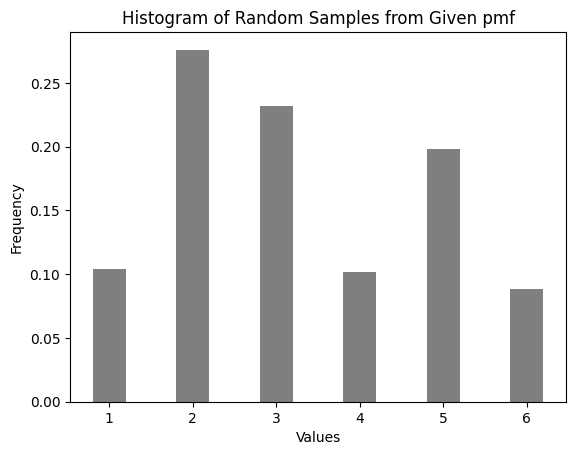

In [1]:
## import modules
import numpy as np
import matplotlib.pyplot as plt

### Part 1 :  Inverse CDF method to drive PMF for discrete variable

# Define the PMF of the discrete distribution
x_values = np.array([1, 2, 3, 4, 5, 6])
pmf = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

# Cumulative distribution function (CDF)-
cdf = np.cumsum(pmf)

# Inverse transform method to sample from the discrete distribution
def inverse_transform_sampling(cdf, values, n):
    u = np.random.rand(n)
    samples = np.searchsorted(cdf, u)
    return values[samples]

# Number of samples to generate
sample_size = 500

# Generate random samples using the inverse transform method
samples = inverse_transform_sampling(cdf, x_values, sample_size)

# Display the sampled data
print(samples)

# Plot a histogram of the generated samples
plt.hist(samples, bins=np.arange(0.5, 7.5, 1), align='mid', rwidth=0.4, color='black', alpha=0.5, density=True)
plt.title('Histogram of Random Samples from Given pmf')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

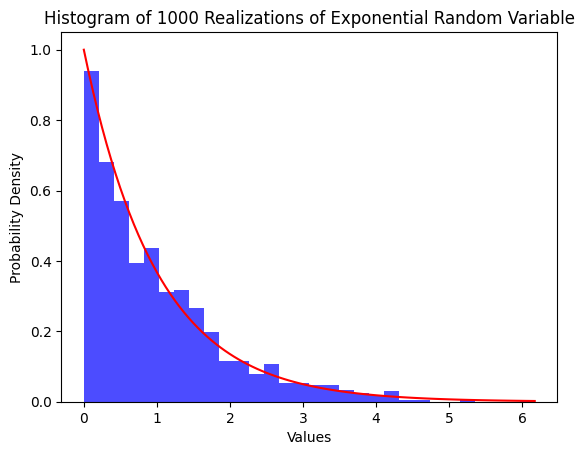

In [2]:

### Part 2 :  Inverse CDF method to derive pdf for continous variable

# Define the CDF of the standard exponential distribution
def exponential_cdf(x, lamda):
    return 1 - np.exp(-lamda * x)

# Inverse CDF method to sample from the standard exponential distribution
def inverse_cdf_exponential(lamda, size=1000):
    u = np.random.rand(size)
    x = -np.log(1 - u) / lamda
    return x

# Parameters for the standard exponential distribution
lamda = 1
sample_size = 1000

# Generate random samples using the inverse CDF method
samples = inverse_cdf_exponential(lamda,size=1000)

# for plotting the the theoretical pdf for comparison
def theoretical_pdf(x, lambda_val):
    return lambda_val * np.exp(-lambda_val * x)
x_theoretical = np.linspace(0, max(samples), 100)

# Plot a histogram of the generated samples
plt.hist(samples, bins=30, density=True, color='blue', alpha=0.7)
plt.plot(x_theoretical, theoretical_pdf(x_theoretical, lamda), 'r-', label='Theoretical PDF')
plt.title('Histogram of 1000 Realizations of Exponential Random Variable')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()

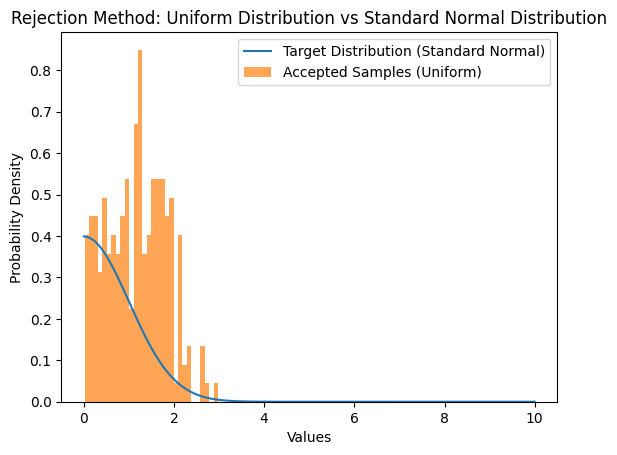

In [3]:
#Q-2
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sample_size = 1000
lower_bound = 0
upper_bound = 10

# Target distribution (standard normal)
def target_distribution(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Proposal distribution (uniform)
uniform_samples = np.random.uniform(lower_bound, upper_bound, sample_size)

# Acceptance/rejection criterion
acceptance_criteria = target_distribution(uniform_samples) / (1 / (upper_bound - lower_bound))

# Generate random values from a uniform distribution to determine acceptance or rejection
random_values = np.random.rand(sample_size)

# Accept the sample if it falls within the target distribution; otherwise, reject it
accepted_samples = uniform_samples[random_values < acceptance_criteria]

# Plotting
x = np.linspace(lower_bound, upper_bound, 1000)
plt.plot(x, target_distribution(x), label='Target Distribution (Standard Normal)')
plt.hist(accepted_samples, bins=30, density=True, alpha=0.7, label='Accepted Samples (Uniform)')
plt.title('Rejection Method: Uniform Distribution vs Standard Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [4]:
#bonus
import numpy as np

# Given values
sensitivity = 0.95
specificity = 0.90
prevalence = 0.01
sample_size = 1000

# Bayes' Theorem to calculate PPV
ppv_formula = (sensitivity * prevalence) / (sensitivity * prevalence + (1 - specificity) * (1 - prevalence))

# Simulation
simulated_results = np.random.rand(sample_size) < prevalence
positive_results = np.random.rand(sample_size) < sensitivity

# Calculate PPV from the simulation
ppv_simulation = np.sum(positive_results & simulated_results) / np.sum(positive_results)

print("PPV (Formula): {:.4f}".format(ppv_formula))
print("PPV (Simulation): {:.4f}".format(ppv_simulation))

PPV (Formula): 0.0876
PPV (Simulation): 0.0136
